# Cleanup

### Intro

Deze file wordt gebruikt om de 'tweet_fng.csv' dataset op te schonen. In de dataset worden er kolommen weggegooid en/of cellen gewijzigd om zo het gewenste dataset te verkrijgen.

### Imports

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
from functions.csv_tools import to_csv
from functions.string_tools import convert_string_to_object
from functions.sentiment_score import SentimentScore

/Users/aliozcan/miniforge3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### Constants

In [2]:
empty_value_treshold = 75

### Load data

In [3]:
file = 'previous_data/combined/tweets_fng.csv'

data = pd.read_csv(file)

data.head()

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,...,user_entities_url,user_entities_description,self_thread,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,conversation_control,user_is_lifeline_institution,real_fake_grade
0,0,Sun Sep 13 23:03:09 +0000 2020,1305280887446151168,1305280887446151168,Our daily update is published. States reported...,False,"[0, 163]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1305280854726340608, 'id_str...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,"{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,Tue May 05 16:30:02 +0000 2020,1257709147539341312,1257709147539341312,President Trump Asked What He Would Do If He W...,False,"[0, 125]","{'hashtags': [{'text': 'donaldtrump', 'indices...",NaN,"<a href=""http://www.TheSpoof.com"" rel=""nofollo...",...,"{'urls': [{'url': 'http://t.co/WIDQSQyOyJ', 'e...",{'urls': []},NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
2,2,Sat Jun 20 22:47:00 +0000 2020,1274473854849609728,1274473854849609728,States reported 630 deaths. We are still seein...,False,"[0, 245]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1274473845252997120, 'id_str...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,"{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},"{'id': 1274465915438956544, 'id_str': '1274465...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3,Sun Sep 20 02:02:00 +0000 2020,1307500226740203526,1307500226740203526,Low #vitaminD was an independent predictor of ...,False,"[0, 112]","{'hashtags': [{'text': 'vitaminD', 'indices': ...","{'media': [{'id': 1307500225330925570, 'id_str...","<a href=""https://prod2.sprinklr.com"" rel=""nofo...",...,"{'urls': [{'url': 'http://t.co/oCTatZ8LWl', 'e...",{'urls': []},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,4,Sun Apr 05 21:47:41 +0000 2020,1246917450924351489,1246917450924351489,A common question: why are the cumulative outc...,False,"[0, 277]","{'hashtags': [{'text': 's', 'indices': [274, 2...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,"{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},"{'id': 1246907915254013953, 'id_str': '1246907...",NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Cleanup

Get all columns with the type 'object'. E.g. strings

In [4]:
string_columns = data.select_dtypes(include=['object']).columns

Get all columns with objects/dictionaries

In [5]:
object_columns = []

for clm in string_columns:
  try:
    contains_object = data[clm].str.contains("{|}").any()

    if contains_object:
      object_columns.append(clm)
  except:
    pass

# columns that need to be excluded
object_columns.remove('full_text')

print(f'All columns with objects:\n{object_columns}')

All columns with objects:
['entities', 'extended_entities', 'user', 'geo', 'coordinates', 'place', 'user_location', 'user_description', 'user_entities', 'entities_hashtags', 'entities_symbols', 'entities_user_mentions', 'entities_urls', 'entities_media', 'extended_entities_media', 'user_entities_url', 'user_entities_description', 'self_thread', 'quoted_status_permalink', 'quoted_status', 'conversation_control']


Drop empty/nan values in source column

In [6]:
# drop na
data = data[data['source'].notna()]
data.reset_index(inplace=True)

data.shape

(7907, 99)

Display all unique source values that include 'twitter.com'

In [7]:
data[data['source'].str.contains('twitter.com')]['source'].unique()

array(['<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>',
       '<a href="https://api.twitter.com/" rel="nofollow">CivilDefWatch</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>',
       '<a href="https://ads-api.twitter.com" rel="nofollow">Twitter for Advertisers (legacy)</a>',
       '<a href="https://www.twitter.com" rel

In [8]:
type(data['user_location'].values[0]) == float

type(np.nan) == float

True

In [9]:
data[pd.notna(data['in_reply_to_user_id'])]

,index,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,...,user_entities_url,user_entities_description,self_thread,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,conversation_control,user_is_lifeline_institution,real_fake_grade
2,2,2,Sat Jun 20 22:47:00 +0000 2020,1274473854849609728,1274473854849609728,States reported 630 deaths. We are still seein...,False,"[0, 245]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1274473845252997120, 'id_str...",...,"{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},"{'id': 1274465915438956544, 'id_str': '1274465...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,4,4,Sun Apr 05 21:47:41 +0000 2020,1246917450924351489,1246917450924351489,A common question: why are the cumulative outc...,False,"[0, 277]","{'hashtags': [{'text': 's', 'indices': [274, 2...",NaN,...,"{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},"{'id': 1246907915254013953, 'id_str': '1246907...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,7,7,Fri Sep 25 14:59:16 +0000 2020,1309507769737850887,1309507769737850887,Two interesting correlations:\n\n1) Children t...,False,"[0, 273]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,...,NaN,{'urls': []},"{'id': 1309507367063687170, 'id_str': '1309507...",NaN,NaN,NaN,NaN,NaN,NaN,-1.0
10,10,10,Mon Sep 21 20:50:15 +0000 2020,1308146545603289089,1308146545603289089,"3/10 About 8% of population ""may be infected a...",False,"[0, 210]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1307989267457748992, 'id_str...",...,"{'urls': [{'url': 'https://t.co/SnOv0usOtw', '...",{'urls': []},"{'id': 1308144123065577474, 'id_str': '1308144...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
11,11,11,Wed Mar 18 19:03:41 +0000 2020,1240353197849378816,1240353197849378816,@narendramodi Govt has added #Corona disease i...,False,"[0, 284]","{'hashtags': [{'text': 'Corona', 'indices': [2...","{'media': [{'id': 1240353189603340290, 'id_str...",...,NaN,{'urls': []},NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7535,7537,3364,Wed Jun 24 05:26:14 +0000 2020,1275661489731485697,1275661489731485697,everytime i get sick which happens about 3-6 t...,False,"[0, 276]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,...,"{'urls': [{'url': 'https://t.co/nzk6vScUR5', '...",{'urls': []},"{'id': 1275661488590598148, 'id_str': '1275661...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
7539,7541,3368,Wed Jun 24 06:35:33 +0000 2020,1275678936056369153,1275678936056369153,Than I don't want to do it. If Trump is not do...,False,"[0, 273]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,...,NaN,{'urls': []},"{'id': 1275678935020339207, 'id_str': '1275678...",NaN,NaN,NaN,NaN,NaN,NaN,0.0
7623,7625,3452,Thu Jun 25 14:32:03 +0000 2020,1276161236636446721,1276161236636446721,• Health department clarifies that steam inhal...,False,"[0, 195]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,...,"{'urls': [{'url': 'https://t.co/op1sHJnd8K', '...",{'urls': []},"{'id': 1276161222195453952, 'id_str': '1276161...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
7625,7627,3454,Fri Jun 26 04:04:02 +0000 2020,1276365578123403264,1276365578123403264,@realDonaldTrump Since there is no cure for th...,False,"[17, 297]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,...,"{'urls': [{'url': 'https://t.co/APC3Ft1pT2', '...","{'urls': [{'url': 'https://t.co/UuuUYuZTcj', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [10]:
l = []
nan_count = 0

for _, row in data['user_entities_description'].iteritems():
  try:
    l.append(len(convert_string_to_object(row)['']))
  except:
    nan_count+=1
  
print(nan_count)
set(l)

len("{'urls': []}")

7907


12

In [11]:
data[pd.notna(data['self_thread'])]

,index,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,...,user_entities_url,user_entities_description,self_thread,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,conversation_control,user_is_lifeline_institution,real_fake_grade
2,2,2,Sat Jun 20 22:47:00 +0000 2020,1274473854849609728,1274473854849609728,States reported 630 deaths. We are still seein...,False,"[0, 245]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1274473845252997120, 'id_str...",...,"{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},"{'id': 1274465915438956544, 'id_str': '1274465...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,4,4,Sun Apr 05 21:47:41 +0000 2020,1246917450924351489,1246917450924351489,A common question: why are the cumulative outc...,False,"[0, 277]","{'hashtags': [{'text': 's', 'indices': [274, 2...",NaN,...,"{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},"{'id': 1246907915254013953, 'id_str': '1246907...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,6,6,Mon Apr 13 21:03:36 +0000 2020,1249805460137365504,1249805460137365504,Our daily update is published. We’ve now track...,False,"[0, 278]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1249804448123080706, 'id_str...",...,"{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},"{'id': 1249805460137365504, 'id_str': '1249805...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,7,7,Fri Sep 25 14:59:16 +0000 2020,1309507769737850887,1309507769737850887,Two interesting correlations:\n\n1) Children t...,False,"[0, 273]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,...,NaN,{'urls': []},"{'id': 1309507367063687170, 'id_str': '1309507...",NaN,NaN,NaN,NaN,NaN,NaN,-1.0
10,10,10,Mon Sep 21 20:50:15 +0000 2020,1308146545603289089,1308146545603289089,"3/10 About 8% of population ""may be infected a...",False,"[0, 210]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1307989267457748992, 'id_str...",...,"{'urls': [{'url': 'https://t.co/SnOv0usOtw', '...",{'urls': []},"{'id': 1308144123065577474, 'id_str': '1308144...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,7869,3696,Tue Jul 07 14:03:36 +0000 2020,1280502733028626432,1280502733028626432,I can’t believe people still think 5G is what ...,False,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,...,NaN,{'urls': []},"{'id': 1280502733028626432, 'id_str': '1280502...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
7869,7871,3698,Tue Jul 07 14:50:08 +0000 2020,1280514443059888130,1280514443059888130,A friend sent us this interview with an ER Doc...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,...,"{'urls': [{'url': 'http://t.co/41vV0akogH', 'e...",{'urls': []},"{'id': 1280514443059888130, 'id_str': '1280514...",NaN,NaN,NaN,NaN,NaN,NaN,-1.0
7870,7872,3699,Tue Jul 07 14:50:08 +0000 2020,1280514443064082437,1280514443064082437,I looked at the recent study that claims that ...,False,"[0, 277]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1280514432293093377, 'id_str...",...,"{'urls': [{'url': 'https://t.co/TuEMDk0hkZ', '...",{'urls': []},"{'id': 1280514443064082437, 'id_str': '1280514...",NaN,NaN,NaN,NaN,NaN,NaN,-1.0
7879,7881,3708,Tue Jul 07 16:58:31 +0000 2020,1280546751229890560,1280546751229890560,1:30 - Covid test\r\n2:00 - drink beer,False,"[0, 35]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,...,NaN,{'urls': []},"{'id': 1280546751229890560, 'id_str': '1280546...",NaN,NaN,NaN,NaN,NaN,NaN,0.5


In [12]:
total = []

for _, row in data['user_advertiser_account_service_levels'].iteritems():
  if pd.notna(row):
    parsed = convert_string_to_object(row)
    if isinstance(parsed, list):
      total += parsed

set(total)

{'analytics', 'dso', 'media_studio', 'mms', 'reseller', 'smb', 'subscription'}

In [13]:
pd.notna(np.nan)

False

### Feature Engineering


Instantiate Sentiment score

In [14]:
sentiment_score = SentimentScore()

Downloading: 100%|██████████| 953/953 [00:00<00:00, 329kB/s]
Downloading: 100%|██████████| 638M/638M [01:02<00:00, 10.8MB/s] 
Downloading: 100%|██████████| 39.0/39.0 [00:00<00:00, 26.1kB/s]
Downloading: 100%|██████████| 851k/851k [00:00<00:00, 1.02MB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 71.4kB/s]


In [15]:
def change_date_format(value):
  weekday = value[0:3]
  time_of_day = int(value[11:13])
  
  # Daypart column
  daypart = 'night'

  if time_of_day >= 6 and time_of_day < 12:
    daypart = 'morning'
  elif time_of_day >= 12 and time_of_day < 18:
    daypart = 'day'
  elif time_of_day >= 18:
    daypart = 'evening'
    
  # Weekend column
  weekend = 0

  if weekday == 'Sat' or weekday == 'Sun':
    weekend = 1

  return (daypart, weekend)

new_columns = {
  'hashtags_count': [],
  'username': [],
  'user_profile_location': [],
  'has_user_url': [],
  'text_length': [],
  'sent_via_twitter': [],
  'twitter_android_user': [],
  'twitter_apple_user': [],
  'tweeted_in_weekend': [],
  'tweeted_in_daypart': [],
  'user_created_in_weekend': [],
  'user_created_in_daypart': [],
  'possibly_sensitive_media': [],
  'user_is_verified': [],
  'user_has_translation_enabled': [],
  'user_has_default_profile': [],
  'user_has_default_profile_image': [],
  'has_pinned_tweet': [],
  'user_has_custom_timeline': [],
  'user_is_advertiser': [],
  'user_service_level_analytics': [],
  'user_service_level_dso': [],
  'user_service_level_media_studio': [],
  'user_service_level_mms': [],
  'user_service_level_reseller': [],
  'user_service_level_smb': [],
  'user_service_level_subscription': [],
  'tweet_contains_url': [],
  'tweet_contains_media': [],
  'user_decscription_has_urls': [],
  'is_quoted_tweet': [],
  'tweet_is_reply': [],
  'part_of_thread': [],
  'user_description_sentiment': [],
  'tweet_sentiment': []
}

data = pd.DataFrame(data)

# iterate through all the rows in the dataset
for _, row in data.iterrows():
  
  # parse entities column
  entities_parsed = convert_string_to_object(row['entities'])
  new_columns['hashtags_count'].append(len(entities_parsed['hashtags']))
  
  # Parse user column
  user_parsed = convert_string_to_object(row['user'])
  new_columns['username'].append(user_parsed['name'])

  location = row['user_location']
  l = 0 if type(location) == float else 1

  new_columns['user_profile_location'].append(l)

  # Check if user has url linked to their profile -> Encoding (0/1)
  has_profile_url = pd.isna(row['user_url']) == False and len(row['user_url']) > 0
  new_columns['has_user_url'].append(int(has_profile_url))

  # Set the tweet text range 
  text_range_converted = convert_string_to_object(row['display_text_range'])
  # Get the length of text without the mentions
  # eg. row = [0, 150] -> 150 - 0 = 150 (text length)
  new_columns['text_length'].append(text_range_converted[1] - text_range_converted[0])

  # Check the origin of the tweet (from where the tweet has been sent)
  # We check on Android and Apple users
  source = row['source'].lower()
  sent_via_twitter = 0
  android_user = 0
  apple_user = 0

  if 'twitter.com' in source:
    sent_via_twitter = 1
    if 'android' in source:
      android_user = 1
    if 'mac' in source or 'ipad' in source or 'iphone' in source:
      apple_user = 1

  new_columns['sent_via_twitter'].append(sent_via_twitter)
  new_columns['twitter_android_user'].append(android_user)
  new_columns['twitter_apple_user'].append(apple_user)

  # Seperate created_at into different parts of the day 
  date = row['created_at']

  daypart, weekend = change_date_format(date)
    
  new_columns['tweeted_in_weekend'].append(weekend)
  new_columns['tweeted_in_daypart'].append(daypart)

  # (re)format the user created at time
  user_created_at = row['user_created_at']
  daypart, weekend = change_date_format(user_created_at)

  new_columns['user_created_in_weekend'].append(weekend)
  new_columns['user_created_in_daypart'].append(daypart)

  # set the field possibly_sensitive as binary
  sensitive = row['possibly_sensitive']
  s = 1 if sensitive else 0

  new_columns['possibly_sensitive_media'].append(s)

  new_columns['user_is_verified'].append(1 if row['user_verified'] else 0)

  new_columns['user_has_translation_enabled'].append(1 if row['user_is_translation_enabled'] else 0)

  new_columns['user_has_default_profile'].append(1 if row['user_default_profile'] else 0)

  new_columns['user_has_default_profile_image'].append(1 if row['user_default_profile_image'] else 0)

  pinned_tweets = row['user_pinned_tweet_ids_str']
  new_columns['has_pinned_tweet'].append(0 if pinned_tweets == '[]' else 1)

  new_columns['user_has_custom_timeline'].append(1 if row['user_has_custom_timelines'] else 0)

  ad_type = row['user_advertiser_account_type']
  new_columns['user_is_advertiser'].append(1 if ad_type == 'promotable_user' else 0)

  account_types = row['user_advertiser_account_service_levels']

  analytics, dso, media_studio, mms, reseller, smb, subscription = 0,0,0,0,0,0,0

  if pd.notna(account_types):
    parsed_account_types = convert_string_to_object(account_types)

    if 'analytics' in parsed_account_types:
      analytics = 1
    if 'dso' in parsed_account_types:
      dso = 1
    if 'media_studio' in parsed_account_types:
      media_studio = 1
    if 'mms' in parsed_account_types:
      mms = 1
    if 'reseller' in parsed_account_types:
      reseller = 1
    if 'smb' in parsed_account_types:
      smb = 1
    if 'subscription' in parsed_account_types:
      subscription = 1

  new_columns['user_service_level_analytics'].append(analytics)
  new_columns['user_service_level_dso'].append(dso)
  new_columns['user_service_level_media_studio'].append(media_studio)
  new_columns['user_service_level_mms'].append(mms)
  new_columns['user_service_level_reseller'].append(reseller)
  new_columns['user_service_level_smb'].append(smb)
  new_columns['user_service_level_subscription'].append(subscription)

  has_url = convert_string_to_object(row['entities_urls'])
  new_columns['tweet_contains_url'].append(int(len(has_url) > 0))
  
  has_media = row['entities_media']

  new_columns['tweet_contains_media'].append(int(pd.notna(has_media)))

  # length of an empty user description urls object with array = 12, 
  new_columns['user_decscription_has_urls'].append(int(len(row['user_entities_description']) > 14))

  new_columns['is_quoted_tweet'].append(int(row['is_quote_status']))

  new_columns['tweet_is_reply'].append(int(pd.notna(row['in_reply_to_user_id'])))

  new_columns['part_of_thread'].append(int(pd.notna(row['self_thread'])))

  # sentiment scores

  user_description = row['user_description']
  description_score = -1

  if pd.notna(user_description):
    description_score = sentiment_score.get_sentiment_score(user_description)
  
  new_columns['user_description_sentiment'].append(description_score)
  
  tweet = row['full_text']
  tweet_score = -1

  if pd.notna(tweet):
    tweet_score = sentiment_score.get_sentiment_score(tweet)
  
  new_columns['tweet_sentiment'].append(tweet_score)

# Create a new dataframe
new_columns = pd.DataFrame(new_columns)

# Add new columns to original dataframe
column_names = [*data.columns.to_list(), *new_columns.columns.to_list()]
data = pd.concat([data, new_columns], ignore_index=True, axis=1)
data.columns = column_names

print(data.shape)
new_columns.head()

(7907, 134)


,hashtags_count,username,user_profile_location,has_user_url,text_length,sent_via_twitter,twitter_android_user,twitter_apple_user,tweeted_in_weekend,tweeted_in_daypart,...,user_service_level_smb,user_service_level_subscription,tweet_contains_url,tweet_contains_media,user_decscription_has_urls,is_quoted_tweet,tweet_is_reply,part_of_thread,user_description_sentiment,tweet_sentiment
0,0,The COVID Tracking Project,0,1,163,1,0,0,1,evening,...,0,0,0,1,0,0,0,0,4,0
1,2,The Spoof,0,1,125,0,0,0,0,day,...,0,0,1,0,0,0,0,0,4,0
2,0,The COVID Tracking Project,0,1,245,1,0,0,1,evening,...,0,0,0,1,0,0,1,1,4,0
3,1,Medscape,1,1,112,0,0,0,1,night,...,1,0,1,1,0,0,0,0,4,1
4,1,The COVID Tracking Project,0,1,277,1,0,0,1,evening,...,0,0,0,0,0,0,1,1,4,2


In [16]:
android = [len(data[data['twitter_android_user'] == 1].values)]
apple = [len(data[data['twitter_apple_user'] == 1].values)]

other = [data.shape[0] - android[0] - apple[0]]

pd.DataFrame({'android': android, 'apple': apple, 'other': other})

,android,apple,other
0,1239,1546,5122


Drop the stringified dictionaries

In [17]:
data.drop(columns=[
  'user',
  'entities',
  'user_geo_enabled',
  'user_url',
  'extended_entities',
  'display_text_range',
  'source',
  'possibly_sensitive',
  'id',
  'user_id',
  'user_name',
  'user_screen_name',
  'user_location',
  'user_entities',
  'user_verified',
  'user_is_translation_enabled',
  'user_profile_background_color',
  'user_profile_background_tile',
  'user_profile_image_url',
  'user_profile_image_url_https',
  'user_profile_link_color',
  'user_profile_sidebar_border_color',
  'user_profile_sidebar_fill_color',
  'user_profile_text_color',
  'user_profile_use_background_image',
  'user_has_extended_profile',
  'user_pinned_tweet_ids',
  'user_pinned_tweet_ids_str',
  'user_has_custom_timelines',
  'user_default_profile',
  'user_default_profile_image',
  'user_advertiser_account_type',
  'user_advertiser_account_service_levels',
  'user_require_some_consent',
  'entities_urls',
  'entities_media',
  'user_entities_url',
  'user_entities_description',
  'entities_symbols',
  'is_quote_status',
  'in_reply_to_user_id',
  'in_reply_to_status_id',
  'entities_hashtags',
  'entities_user_mentions',
  'user_profile_background_image_url_https',
  'user_profile_background_image_url',
  'extended_entities_media',
  'user_profile_banner_url',
  'quoted_status_id',
  'index'
], inplace=True)

In [18]:
data.shape

(7907, 84)

In [19]:
from functions.date_time_epoch_time_conversion import convert_date_time_to_unix

created_at = data['created_at'].values

user_created_at = data['user_created_at'].values

created_at = [int(convert_date_time_to_unix(i)) for i in created_at]

user_created_at = [int(convert_date_time_to_unix(i)) for i in user_created_at]

data['user_creation_tweet_diff'] = [i-j for i,j in zip(created_at, user_created_at)]

In [20]:
data.drop(columns=['created_at'], inplace=True)

### Drop columns

Verwijder unnamed kolom

In [21]:
data.drop('Unnamed: 0', axis=1, inplace=True)

Verwijder kolommen waarven maar 1 unieke waarde is. Dit heeft geen toegevoegde waarde op het predicten van de label.

In [22]:
uni_data = [i for i in data.columns if data.nunique()[i] == 1]

data.drop(uni_data, axis=1, inplace=True)

data.shape

(7907, 71)

Verwijder user_id_str en quoted_status_id_str, aangezien er een duplicate kolom in string versie is

In [23]:
data.drop(['id_str', 'user_id_str', 'quoted_status_id_str'], axis=1, inplace=True)
data.shape

(7907, 68)

Drop columns if they are completely empty

In [24]:
data.dropna(axis='columns')
data.shape

(7907, 68)

Drop columns if 75% or more cells are empty/NaN

In [25]:
# Remove spaces to check wheter a cell is equal to an empty string
data.replace(r'^\s *$', np.nan, regex=True, inplace=True)

excluded = ['in_reply_to_status_id', 'in_reply_to_user_id', 'quoted_status_id']

nans = data.isna().sum()
cols = [i for i in nans.keys() if nans[i]/data.shape[0]*100 > empty_value_treshold and i not in excluded]

data.drop(cols, axis=1, inplace=True)

cols

['in_reply_to_status_id_str',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'user_utc_offset',
 'user_time_zone',
 'user_lang',
 'user_following',
 'user_follow_request_sent',
 'user_notifications',
 'self_thread',
 'quoted_status_permalink',
 'quoted_status',
 'conversation_control']

In [26]:
data.shape

(7907, 51)

Verwijder language

In [27]:
data[data['lang'] != 'en']['lang'].count()

49

In [28]:
data.drop('lang', axis=1, inplace=True)

data.shape

(7907, 50)

Verwijder rijen met null waardes in real_fake_grade

In [29]:
data['real_fake_grade'].isna().sum()


2

In [30]:
data = data[pd.notnull(data['real_fake_grade'])]

data.shape

(7905, 50)

### Encoding

In [33]:
lb = LabelEncoder()

Verander booleans (True/False) naar getallen (0/1)

In [34]:
binary_data = [i for i in data.columns if data.nunique()[i] == 2]
data[binary_data].dtypes

user_translator_type               object
user_profile_location               int64
has_user_url                        int64
sent_via_twitter                    int64
twitter_android_user                int64
twitter_apple_user                  int64
tweeted_in_weekend                  int64
user_created_in_weekend             int64
possibly_sensitive_media            int64
user_is_verified                    int64
user_has_translation_enabled        int64
user_has_default_profile            int64
user_has_default_profile_image      int64
has_pinned_tweet                    int64
user_has_custom_timeline            int64
user_is_advertiser                  int64
user_service_level_analytics        int64
user_service_level_dso              int64
user_service_level_media_studio     int64
user_service_level_mms              int64
user_service_level_reseller         int64
user_service_level_smb              int64
user_service_level_subscription     int64
tweet_contains_url                

In [35]:
binary_data = [i for i in data.columns if data.dtypes[i] == 'object' and data.nunique()[i] == 2]

print(binary_data)

data[binary_data] = data[binary_data].apply(lb.fit_transform)

data[binary_data]

['user_translator_type']


,user_translator_type
0,0
1,0
2,0
3,0
4,0
...,...
7902,0
7903,0
7904,0
7905,0


In [36]:
data = pd.get_dummies(data, columns=['tweeted_in_daypart', 'user_created_in_daypart'])

In [37]:
data.dtypes

full_text                           object
retweet_count                        int64
favorite_count                       int64
user_description                    object
user_followers_count                 int64
user_normal_followers_count          int64
user_friends_count                   int64
user_listed_count                    int64
user_created_at                     object
user_favourites_count                int64
user_statuses_count                  int64
user_media_count                     int64
user_translator_type                 int64
real_fake_grade                    float64
hashtags_count                       int64
username                            object
user_profile_location                int64
has_user_url                         int64
text_length                          int64
sent_via_twitter                     int64
twitter_android_user                 int64
twitter_apple_user                   int64
tweeted_in_weekend                   int64
user_create

real_fake_grade cleanup

    - 1     → 1
    - 0.75  → 1
    - 0.5   → 1
    - 0.25  → 0
    - 0     → 0
    - 0.25  → 0
    - -0.5  → -1
    - 0.75  → -1
    - -1    → -1
    - Nan   → 0

In [38]:
data['real_fake_grade'] = data['real_fake_grade'].replace([0.5, 0.75], 1)

data['real_fake_grade'] = data['real_fake_grade'].replace([-0.25, 0.25], 0)

data['real_fake_grade'] = data['real_fake_grade'].replace([-0.5, 0.75], -1)

data['real_fake_grade'] = data['real_fake_grade'].fillna(0)

In [39]:
data.select_dtypes(include=['object']).columns

Index(['full_text', 'user_description', 'user_created_at', 'username'], dtype='object')

In [40]:
data.shape

(7905, 56)

In [41]:
test = [k for k,v in data.isna().sum().items() if v > 0]

data[test].isna().sum()

user_description    433
dtype: int64

In [42]:
# make sure real fake grade (y) is at the end of the dataframe
rfg = data['real_fake_grade']

data = data.drop(columns=['real_fake_grade', 'user_created_at'], axis=1)

data['real_fake_grade'] = rfg

### Save data to CSV

In [43]:
directory = './cleaned_data'

#### Tweet data columns to CSV

In [44]:
tweet_columns = [
  'retweet_count', 'favorite_count', 'hashtags_count', 'text_length', 'sent_via_twitter', 'twitter_android_user',
  'twitter_apple_user', 'tweeted_in_weekend', 'possibly_sensitive_media', 'tweet_contains_url', 'tweet_contains_media',
  'is_quoted_tweet', 'tweet_is_reply', 'part_of_thread', 'tweeted_in_daypart_day', 'tweeted_in_daypart_evening',
  'tweeted_in_daypart_morning', 'tweeted_in_daypart_night', 'user_description_sentiment', 'tweet_sentiment', 'real_fake_grade'
]

tweet_data = data[tweet_columns]

tweet_data.head(2)
to_csv(tweet_data, directory, 'tweet_data_columns.csv')

Succesfully saved data to ./cleaned_data/tweet_data_columns.csv


#### User data columns to CSV

In [45]:
user_columns = [
  'user_followers_count', 'user_normal_followers_count', 'user_friends_count', 'user_listed_count', 'user_favourites_count', 'user_statuses_count',
  'user_media_count', 'user_translator_type', 'user_profile_location', 'has_user_url', 'user_created_in_weekend', 'user_is_verified', 'user_has_translation_enabled',
  'user_has_default_profile', 'user_has_default_profile_image', 'has_pinned_tweet', 'user_has_custom_timeline', 'user_is_advertiser',  'user_service_level_analytics',
  'user_service_level_dso', 'user_service_level_media_studio', 'user_service_level_mms', 'user_service_level_reseller', 'user_service_level_smb','user_service_level_subscription',
  'user_decscription_has_urls', 'user_creation_tweet_diff', 'user_created_in_daypart_day', 'user_created_in_daypart_evening', 'user_created_in_daypart_morning',
  'user_created_in_daypart_night', 'real_fake_grade'
]

user_data = data[user_columns]

to_csv(user_data, directory, 'user_data_columns.csv')

Succesfully saved data to ./cleaned_data/user_data_columns.csv


#### Text columns to CSV

In [46]:
text_data = data[['username', 'full_text', 'user_description', 'real_fake_grade']]

to_csv(text_data, directory, 'text_columns.csv')

Succesfully saved data to ./cleaned_data/text_columns.csv


In [49]:
from functions.text_dataset import make_clean_dataset_2021_cleaned, make_clean_dataset_2022

make_clean_dataset_2022()
make_clean_dataset_2021_cleaned()

b'Skipping line 10: expected 3 fields, saw 4\nSkipping line 69: expected 3 fields, saw 5\nSkipping line 163: expected 3 fields, saw 4\nSkipping line 172: expected 3 fields, saw 4\nSkipping line 184: expected 3 fields, saw 4\nSkipping line 249: expected 3 fields, saw 4\nSkipping line 250: expected 3 fields, saw 4\nSkipping line 254: expected 3 fields, saw 4\nSkipping line 264: expected 3 fields, saw 7\nSkipping line 285: expected 3 fields, saw 4\nSkipping line 326: expected 3 fields, saw 5\nSkipping line 344: expected 3 fields, saw 4\nSkipping line 349: expected 3 fields, saw 4\nSkipping line 357: expected 3 fields, saw 4\nSkipping line 368: expected 3 fields, saw 4\nSkipping line 371: expected 3 fields, saw 5\nSkipping line 405: expected 3 fields, saw 4\nSkipping line 479: expected 3 fields, saw 4\nSkipping line 480: expected 3 fields, saw 5\nSkipping line 487: expected 3 fields, saw 4\nSkipping line 517: expected 3 fields, saw 4\nSkipping line 525: expected 3 fields, saw 4\nSkipping l

#### All columns to CSV

In [50]:
# Save data to an csv file
to_csv(data, directory, 'all_columns.csv')

Succesfully saved data to ./cleaned_data/all_columns.csv


In [51]:
test = pd.read_csv(directory + '/' + 'all_columns.csv')

test.head(3)

,Unnamed: 0,full_text,retweet_count,favorite_count,user_description,user_followers_count,user_normal_followers_count,user_friends_count,user_listed_count,user_favourites_count,...,user_creation_tweet_diff,tweeted_in_daypart_day,tweeted_in_daypart_evening,tweeted_in_daypart_morning,tweeted_in_daypart_night,user_created_in_daypart_day,user_created_in_daypart_evening,user_created_in_daypart_morning,user_created_in_daypart_night,real_fake_grade
0,0,Our daily update is published. States reported...,171,528,We try to provide the most comprehensive state...,468030,468030,13,6034,85,...,16384932,0,1,0,0,0,0,1,0,1.0
1,1,President Trump Asked What He Would Do If He W...,0,0,"Spoof news, political satire, parody and more!...",803,803,97,118,1,...,293776787,1,0,0,0,0,0,1,0,-1.0
2,2,States reported 630 deaths. We are still seein...,71,199,We try to provide the most comprehensive state...,468030,468030,13,6034,85,...,9039963,0,1,0,0,0,0,1,0,1.0


In [52]:
test.shape

(7905, 56)

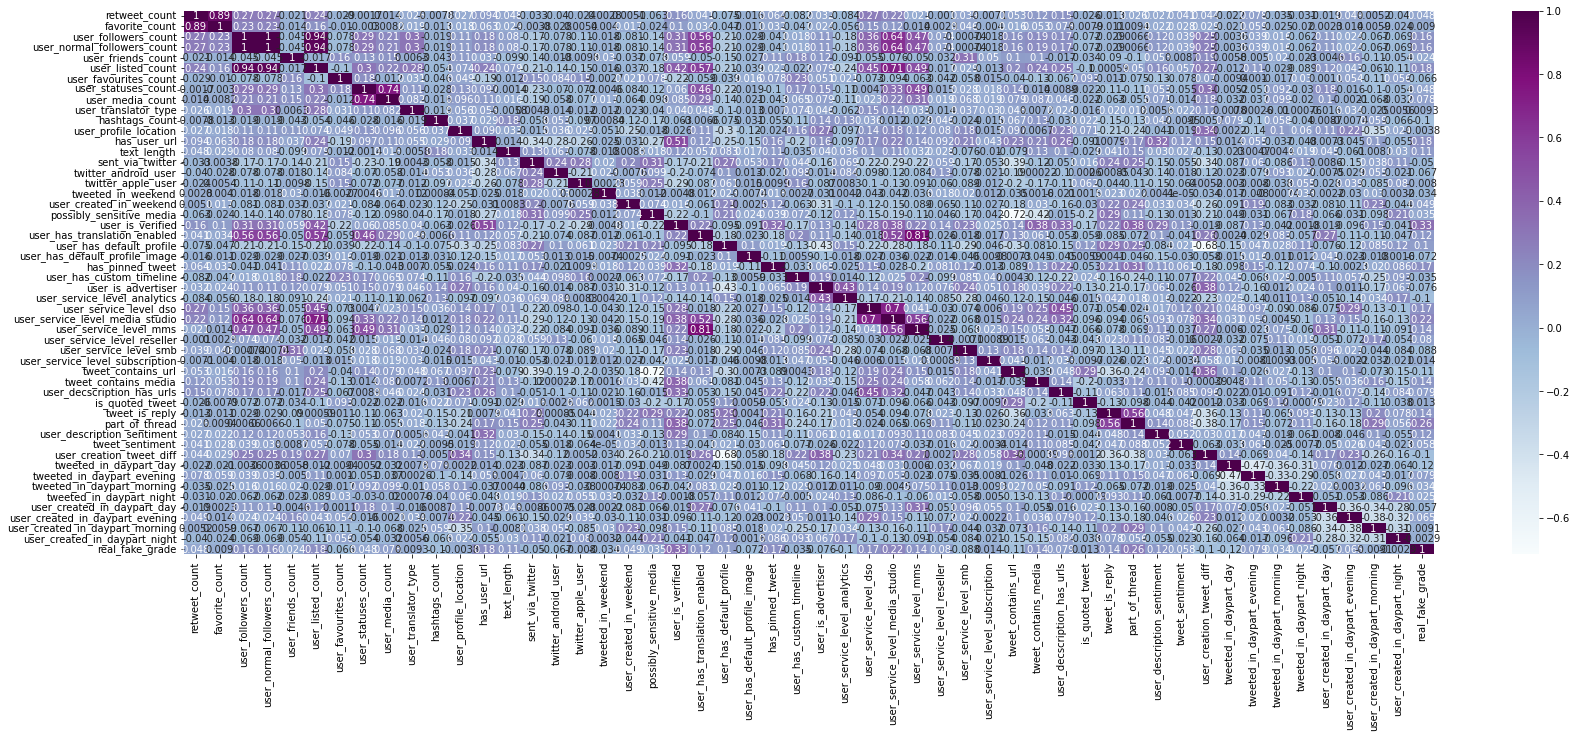

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(28,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.BuPu)
plt.show()